## **Task 5 - Customer Segmentation -- K-Means Clustering Exploration.**

**Name: Prateek Bajpai**

**Class: Data Science & Big Data Analytics.**

## **Importing Libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

## **Data Loading.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and columns
df.shape

(200, 5)

## **Data Visualization.**

<ipython-input-7-857a624d6db1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')


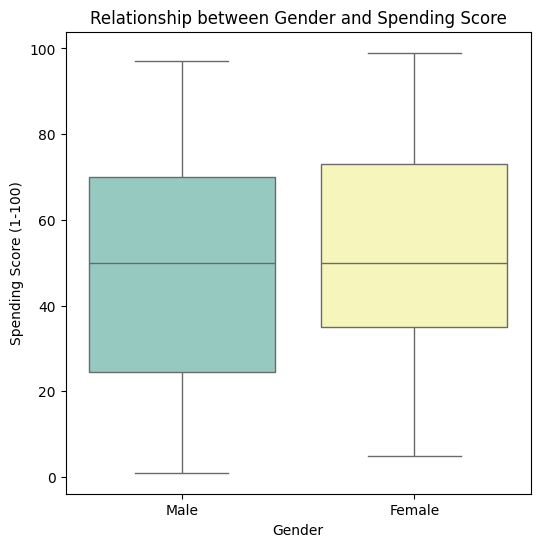

In [ ]:
# Relationship between Gender and Spending Score

plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title('Relationship between Gender and Spending Score')
plt.show()

## **Data Preprocessing.**

In [ ]:
# Selecting features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Exploring K-Means Clustering.**

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


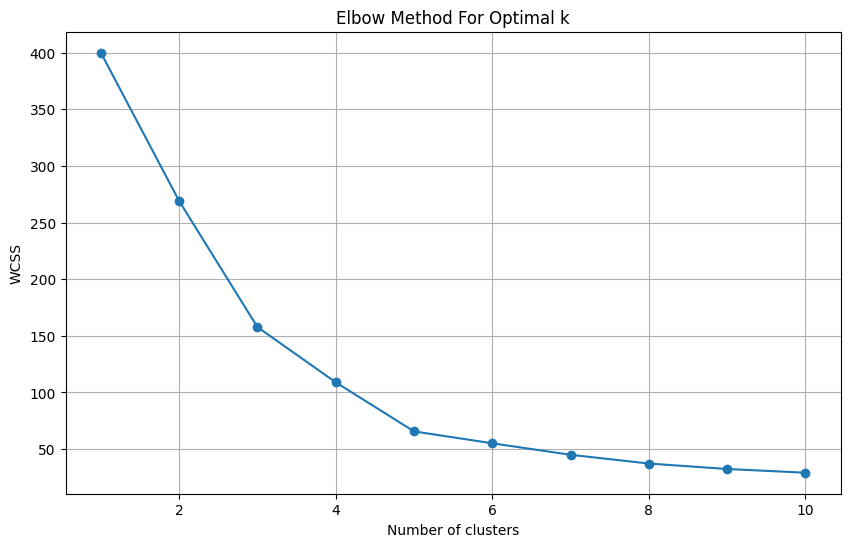

In [ ]:
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Finding the optimal number of clusters using the elbow method
optimal_clusters = np.argmin(np.diff(np.diff(wcss))) + 3  # +3 because the second derivative shifts the index by 2
print(optimal_clusters)

7


In [ ]:
# Running KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(X_scaled)

KMeans(n_clusters=7, n_init=10, random_state=0)

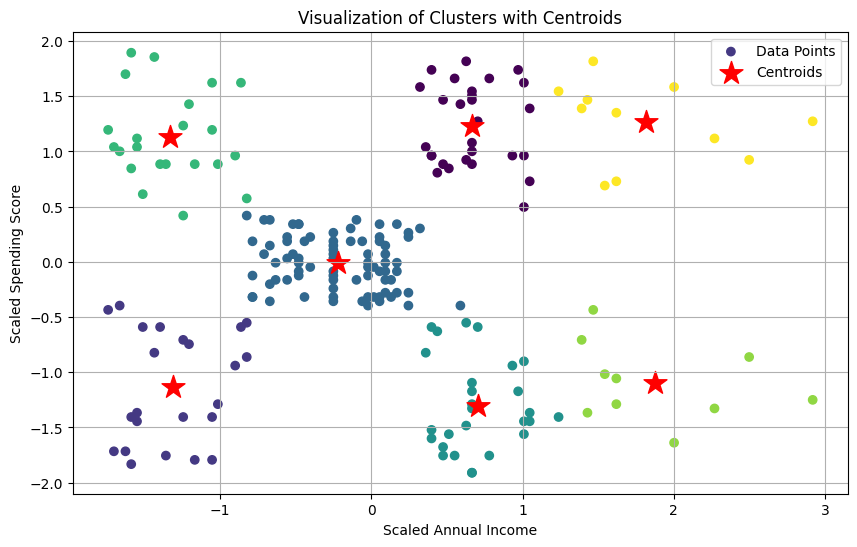

In [ ]:
# Visualizing the clusters with centroids
centroids = kmeans_optimal.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='*')
plt.title('Visualization of Clusters with Centroids')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.grid(True)
plt.show()

## **Comparing Euclidean & Mahalanobis Distance Methods.**

In [ ]:
# KMeans with Euclidean distance                                                   It is the straight-line distance between two points
kmeans_euclidean = KMeans(n_clusters=7,n_init=10, random_state=0)
kmeans_euclidean.fit(X_scaled)
labels_euclidean = kmeans_euclidean.labels_

In [ ]:
# KMeans with Mahalanobis distance                                                 It is a measure of the distance between a point and a distribution.
inverse_covariance_matrix = np.linalg.inv(np.cov(X_scaled, rowvar=False))
def mahalanobis(u, v):
    return np.sqrt(((u-v)@inverse_covariance_matrix@(u-v).T))

In [ ]:
distance_matrix = pairwise_distances(X_scaled, metric=mahalanobis)

In [ ]:
# KMeans with precomputed distance matrix
kmeans_mahalanobis = KMeans(n_clusters=7, n_init=10, random_state=0)
kmeans_mahalanobis.fit(distance_matrix)
labels_mahalanobis = kmeans_mahalanobis.labels_

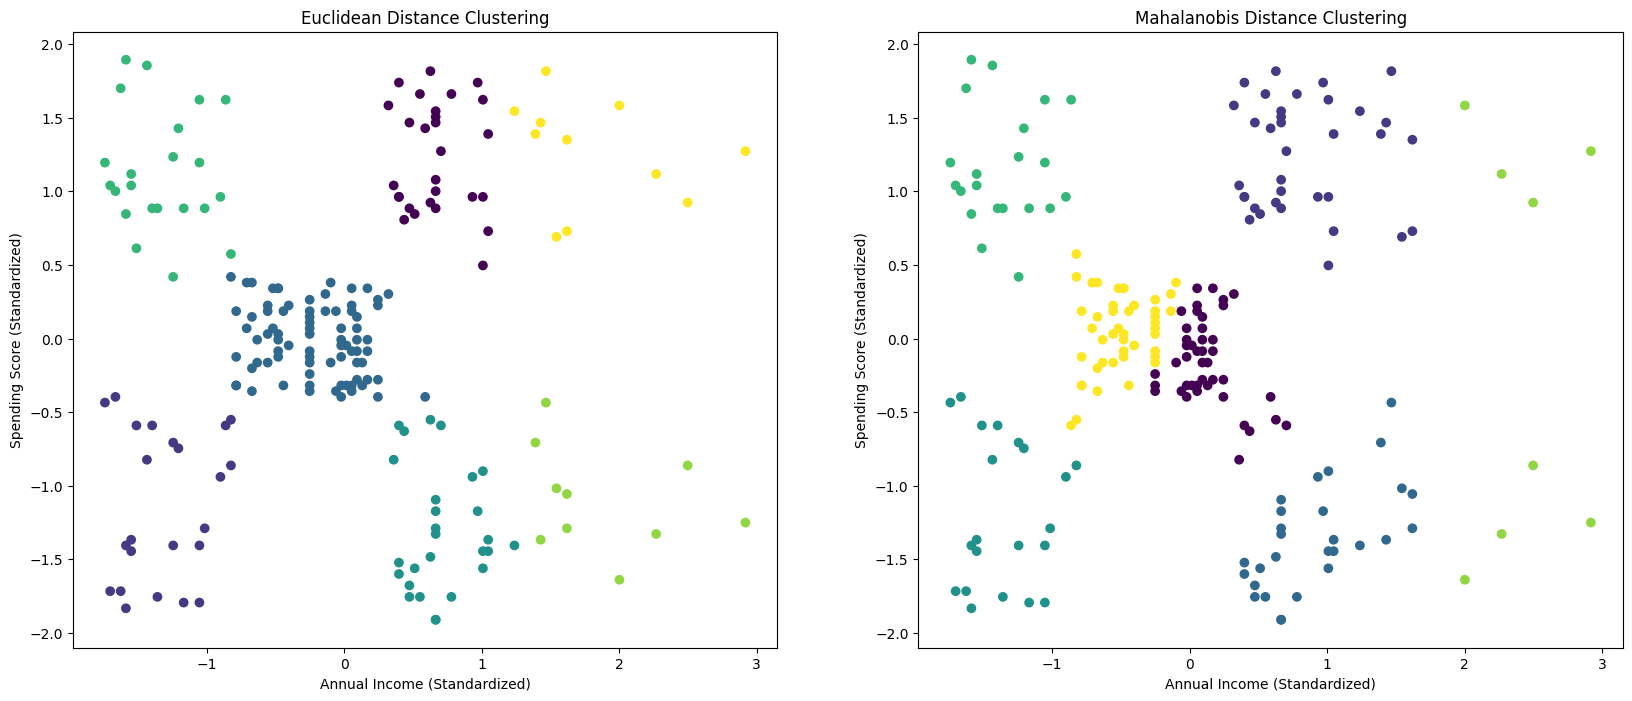

Side-by-side comparison of Euclidean and Mahalanobis distance clustering completed.


In [ ]:
# Plotting both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Euclidean
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis', marker='o')
ax1.set_title('Euclidean Distance Clustering')
ax1.set_xlabel('Annual Income (Standardized)')
ax1.set_ylabel('Spending Score (Standardized)')

# Mahalanobis
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_mahalanobis, cmap='viridis', marker='o')
ax2.set_title('Mahalanobis Distance Clustering')
ax2.set_xlabel('Annual Income (Standardized)')
ax2.set_ylabel('Spending Score (Standardized)')

plt.show()

print('Side-by-side comparison of Euclidean and Mahalanobis distance clustering completed.')

## **Silhouette Score & Calinski-Harabasz Score.**

In [ ]:
# Silhouette Score
silhouette_euclidean = silhouette_score(X_scaled, labels_euclidean)
silhouette_mahalanobis = silhouette_score(X_scaled, labels_mahalanobis)

# Calinski-Harabasz Score     # Also called as variance ratio criterion
calinski_euclidean = calinski_harabasz_score(X_scaled, labels_euclidean)
calinski_mahalanobis = calinski_harabasz_score(X_scaled, labels_mahalanobis)

silhouette_scores = {'Euclidean Distance': silhouette_euclidean, 'Mahalanobis Distance': silhouette_mahalanobis}
calinski_scores = {'Euclidean Distance': calinski_euclidean, 'Mahalanobis Distance': calinski_mahalanobis}


print("Silhouette Score = ", silhouette_scores)
print("Calinski-Harabasz Score = ", calinski_scores)      # It provides a measure of how distinct and well-separated the clusters are from each other.


Silhouette Score =  {'Euclidean Distance': 0.5263454490712252, 'Mahalanobis Distance': 0.4569235884273422}
Calinski-Harabasz Score =  {'Euclidean Distance': 254.32469420700534, 'Mahalanobis Distance': 212.33963454176583}


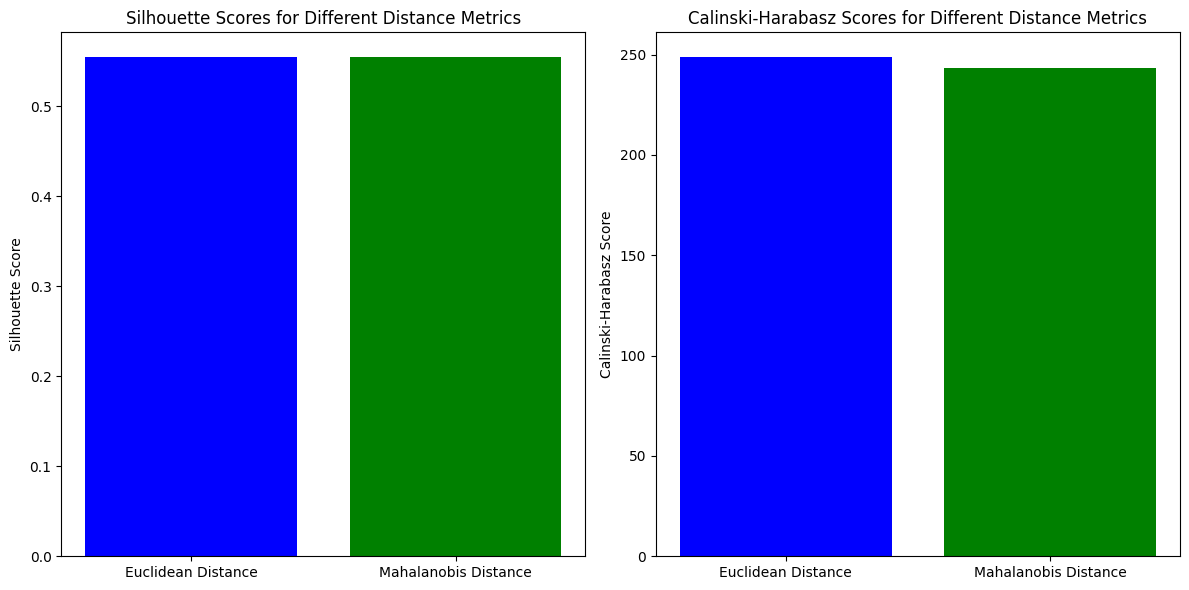

In [ ]:
import matplotlib.pyplot as plt

# Plotting Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['blue', 'green'])
plt.title('Silhouette Scores for Different Distance Metrics')
plt.ylabel('Silhouette Score')

# Plotting Calinski-Harabasz Scores
plt.subplot(1, 2, 2)
plt.bar(calinski_scores.keys(), calinski_scores.values(), color=['blue', 'green'])
plt.title('Calinski-Harabasz Scores for Different Distance Metrics')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()